In [1]:
import sys
sys.path.append('../')

In this notebook the analysis of cross-match results is performed.

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match, rayleigh_plot
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
set_mpl()
%matplotlib inline

matplotlib settings set


matplotlib settings set
matplotlib settings set


loading data

In [3]:
nway_all = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl', compression='gzip')

nway_best = nway_all.query('nway_match_flag == 1')

nway_all_dist_only = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only_all_candidates.gz_pkl', compression='gzip')

nway_best_dist_only = nway_all_dist_only.query('nway_match_flag == 1')

In [1]:
#those are optimal p_any thresholds for the best match for three different cases
p0_all = 0.12
p0_dist = 0.24
p0_all_bright = 0.11

# Some source statistics

### all matches

In [6]:
display(pd.DataFrame(nway_best.groupby(['nway_is_closest']).size()))
display(pd.DataFrame(nway_best.groupby(['nway_is_within_pos_r98']).size()))


,0
nway_is_closest,
False,1019
True,5866


,0
nway_is_within_pos_r98,
False,427
True,6458


### correct matches to validation catalog

In [7]:
correct_id = nway_best.query('desi_id == desi_id_true & ~desi_id_true.isna()')
pd.DataFrame(correct_id.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size())

0
nway_is_closest nway_is_within_pos_r98     
False           True                     42
True            False                     2
                True                    463

### INcorrect matches to validation catalog

In [8]:
incorrect_id = nway_best.query('desi_id != desi_id_true & ~desi_id_true.isna() & desi_id_true!="hostless"')
pd.DataFrame(incorrect_id.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size())

0
nway_is_closest nway_is_within_pos_r98    
False           True                     5
True            False                    1
                True                    16

### Distribution of sources in p_any

In [9]:
n_over_p0 = len(nway_best.query('nway_prob_has_match>0.1'))
frav_over_p0 = n_over_p0/len(nway_best)
print(f'NWAY: {n_over_p0} ({frav_over_p0:.2f})')

NWAY: 6397 (0.93)


In [10]:
n_over_p0 = len(nway_best.query('nway_prob_has_match>@p0_all'))
frav_over_p0 = n_over_p0/len(nway_best)
print(f'NWAY: {n_over_p0} ({frav_over_p0:.2f})')

NWAY: 6346 (0.92)


In [11]:
n_over_p0 = len(nway_best.query('nway_prob_has_match>0.8'))
frav_over_p0 = n_over_p0/len(nway_best)
print(f'NWAY: {n_over_p0} ({frav_over_p0:.2f})')

NWAY: 4360 (0.63)


In [30]:
print(len(nway_best.query('nway_prob_this_match>0.8')))
print(len(nway_best.query('nway_prob_this_match>0.8'))/len(nway_best))


5919
0.8596949891067538


# Completeness/purity analysis (including hostless)

Report for paper

In [32]:
pany, Q, Cc, Pc, Ch, Ph, _ = assess_goodnes_of_cross_match(nway_best, p_any_cut=p0_all, plot_res=False)
pany_naive, Q_naive, Cc_naive, Pc_naive, Ch_naive, Ph_naive, _ = assess_goodnes_of_cross_match(nway_best_dist_only, p_any_cut=p0_dist, plot_res=False)

pany_brighthost, Q_brighthost, Cc_brighthost, Pc_brighthost, Ch_brighthost, Ph_brighthost, _ = assess_goodnes_of_cross_match(nway_best.query('`flux_05-20`>1e-14'), p_any_cut=p0_all_bright, plot_res=False)

p_any cut: 0.12

                Total validation set: 559
                	 Total hostless: 30
                	 Total not hostless: 529
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 503
                	 Correct not hostless with incorrect ctp: 20
                	 Incorrect not hostless: 6
                Assigned hostless:
                	 Incorrect hostless: 6
                	 Correct hostless: 24

                Overall purity: 0.94
                Not hostless purity: 0.95
                Not hostless completeness: 0.95
                Hostless purity: 0.80
                Hostless completeness: 0.80
            
p_any cut: 0.24

                Total validation set: 559
                	 Total hostless: 30
                	 Total not hostless: 529
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 460
                	 Correct not hostless with incorrect ctp: 61
                	 I

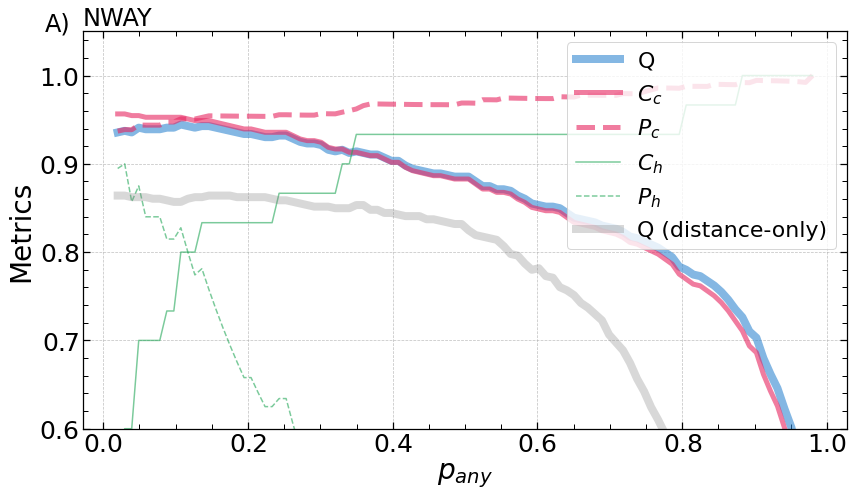

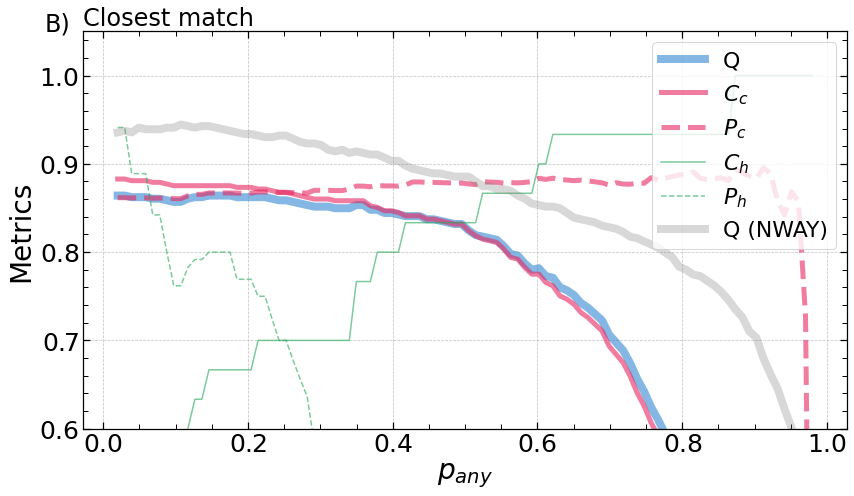

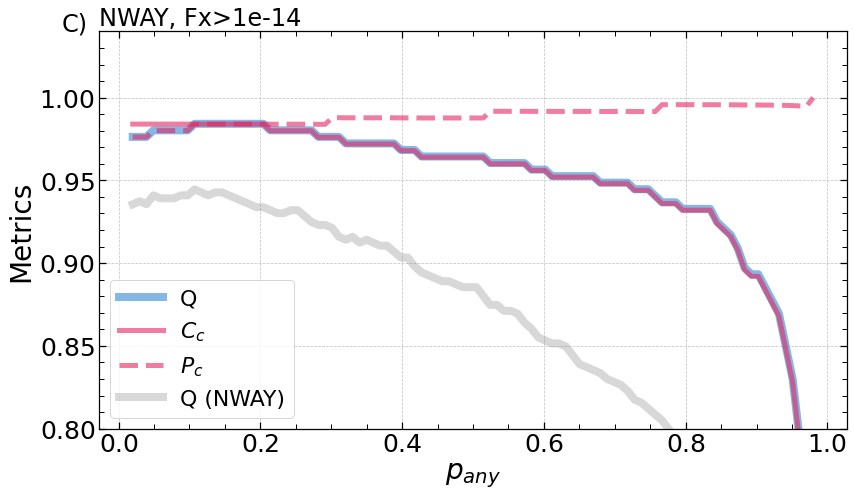

In [15]:
figsizes = (12,7)
fig,  ax =  plt.subplots( figsize = figsizes)

ax.plot(pany, Q, label='Q', color = 'C0', lw = 8, ls = '-', alpha = 0.6)
ax.plot(pany, Cc, label='$C_c$', color = 'C1', lw = 5, ls = '-', alpha = 0.6)
ax.plot(pany, Pc, label='$P_c$', color = 'C1', lw = 5, ls = '--', alpha = 0.6)
ax.plot(pany, Ch, label='$C_h$', color = 'C2', lw = 1.5, ls = '-', alpha = 0.6)
ax.plot(pany, Ph, label='$P_h$', color = 'C2', lw = 1.5, ls = '--', alpha = 0.6)
ax.plot(pany, Q_naive, label='Q (distance-only)', color = 'gray', lw = 8, ls = '-', alpha = 0.3)
ax.text(-0.05, +0.1+0.95, 'A)', transform=ax.transAxes, fontsize=24, verticalalignment='top')

ax.set_ylim(0.6, 1.05)
ax.set_xlabel('$p_{any}$', fontsize = 28)
ax.set_ylabel('Metrics', fontsize = 28)
ax.legend(fontsize = 22, loc = 'upper right')
ax.set_title('NWAY', fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=25)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/quality_metrics.pdf')



fig,  ax =  plt.subplots( figsize = figsizes)
ax.plot(pany, Q_naive, label='Q', color = 'C0', lw = 8, ls = '-', alpha = 0.6)
ax.plot(pany, Cc_naive, label='$C_c$', color = 'C1', lw = 5, ls = '-', alpha = 0.6)
ax.plot(pany, Pc_naive, label='$P_c$', color = 'C1', lw = 5, ls = '--', alpha = 0.6)
ax.plot(pany, Ch_naive, label='$C_h$', color = 'C2', lw = 1.5, ls = '-', alpha = 0.6)
ax.plot(pany, Ph_naive, label='$P_h$', color = 'C2', lw = 1.5, ls = '--', alpha = 0.6)
ax.plot(pany, Q, label='Q (NWAY)', color = 'gray', lw = 8, ls = '-', alpha = 0.3)
ax.text(-0.05, +0.1+0.95, 'B)', transform=ax.transAxes, fontsize=24, verticalalignment='top')


ax.set_ylim(0.6, 1.05)
ax.set_xlabel('$p_{any}$', fontsize = 28)
ax.set_ylabel('Metrics', fontsize = 28)
ax.legend(fontsize = 22, loc = 'upper right')
ax.set_title('Closest match', fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=25)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/quality_metrics_naive.pdf')




fig,  ax =  plt.subplots( figsize = figsizes)
ax.plot(pany, Q_brighthost, label='Q', color = 'C0', lw = 8, ls = '-', alpha = 0.6)
ax.plot(pany, Cc_brighthost, label='$C_c$', color = 'C1', lw = 5, ls = '-', alpha = 0.6)
ax.plot(pany, Pc_brighthost, label='$P_c$', color = 'C1', lw = 5, ls = '--', alpha = 0.6)
ax.plot(pany, Q, label='Q (NWAY)', color = 'gray', lw = 8, ls = '-', alpha = 0.3)
ax.text(-0.05, +0.1+0.95, 'C)', transform=ax.transAxes, fontsize=24, verticalalignment='top')

ax.set_ylim(0.8, 1.04)
ax.set_xlabel('$p_{any}$', fontsize = 28)
ax.set_ylabel('Metrics', fontsize = 28)
ax.legend(fontsize = 22)
ax.set_title('NWAY, Fx>1e-14', fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=25)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/quality_metrics_bright.pdf')



# Distribution of `p_any` 

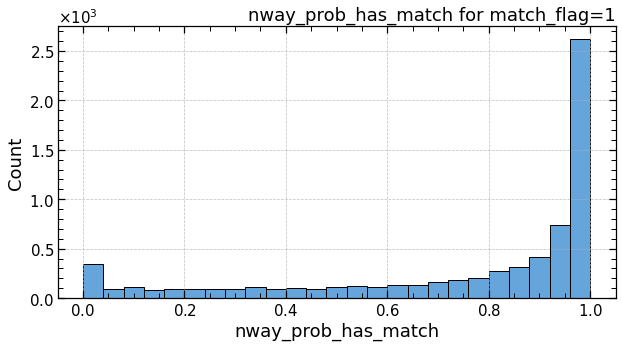

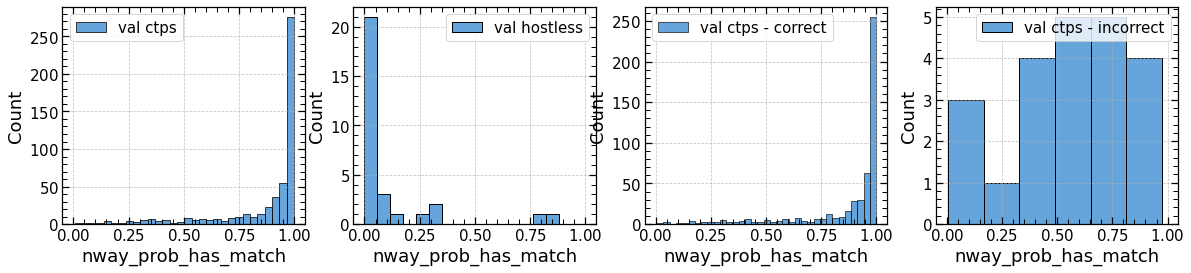

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(nway_best.nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1', loc = 'right')


fig, axs =  plt.subplots(nrows=1, ncols = 4, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (20,4))


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[0], label = 'val ctps')
axs[0].legend()


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true=="hostless"').nway_prob_has_match, ax = axs[1], label = 'val hostless')
axs[1].legend()


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true==desi_id & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[2], label = 'val ctps - correct')
axs[2].legend()

sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true!=desi_id & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[3], label = 'val ctps - incorrect')
axs[3].legend()

Text(1.0, 1.0, 'nway_prob_has_match for match_flag=1 and DET_LIKE>15')

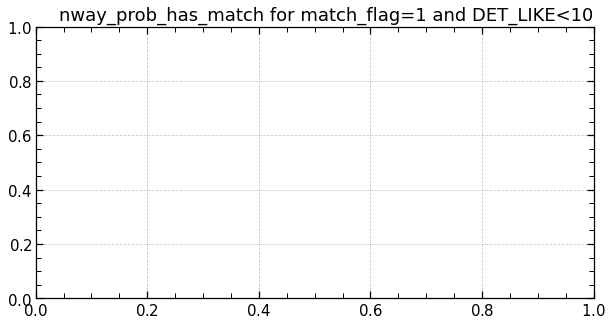

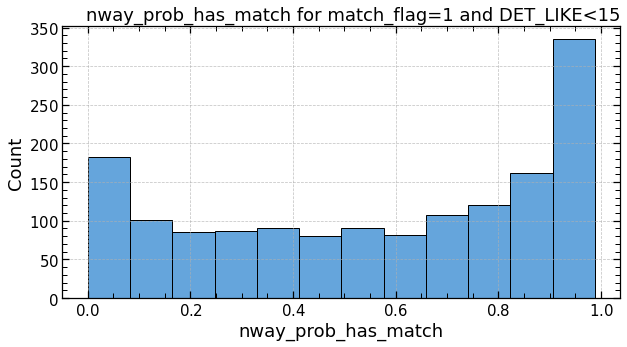

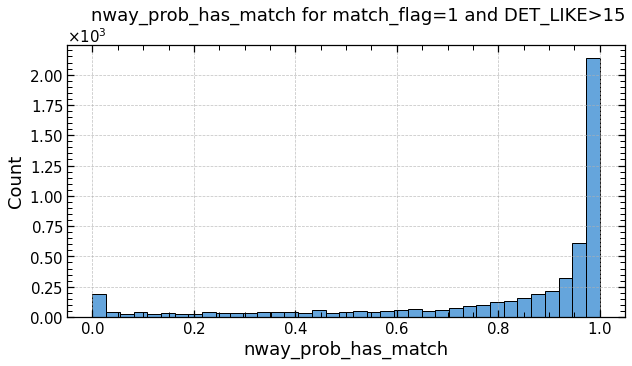

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0<10').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE<10', loc = 'right')

plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0<15').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE<15', loc = 'right')
plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0>15').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE>15', loc = 'right')


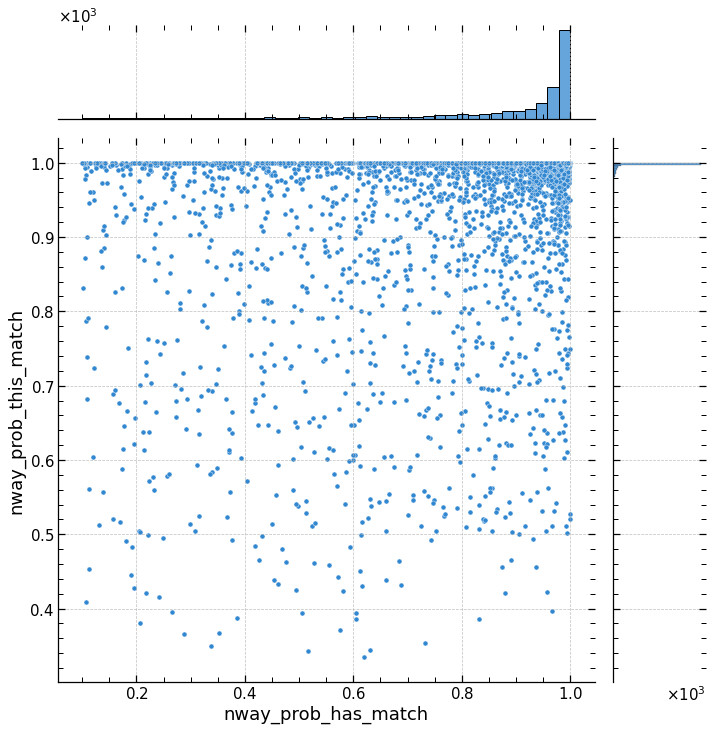

In [20]:
sns.jointplot(data = nway_best.query('nway_prob_has_match>0.1 & DET_LIKE_0>15'), x = 'nway_prob_has_match', y = 'nway_prob_this_match', height = 10)


# Proportion of seemingly hostless as a function of flux

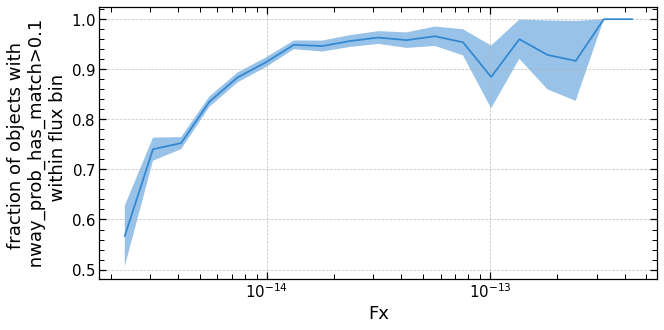

In [21]:
fluxes = np.geomspace(2e-15, 5e-13, 20)
pcut = 0.3
fracs = []
fracs_err = []
for i in range(len(fluxes)-1):
    flux_bin_lo = fluxes[i]
    flux_bin_hi = fluxes[i+1]
    dt_tmp_all = nway_best.query('`flux_05-20`>@flux_bin_lo & `flux_05-20`<@flux_bin_hi')
    dt_tmp_pcut = dt_tmp_all.query('nway_prob_has_match>@pcut')
    #dt_tmp_all = nway_best.query('`flux_05-20`>@flux')
    #dt_tmp_pcut = dt_tmp_all.query('nway_prob_has_match>@pcut')
    n_all = len(dt_tmp_all)
    n_pcut = len(dt_tmp_pcut)
    frac = n_pcut/n_all
    frac_err = np.sqrt(frac*(1-frac)/n_all)
    fracs.append(frac)
    fracs_err.append(frac_err)

fracs = np.array(fracs)
fracs_err = np.array(fracs_err)
plt.figure(figsize=(10,5))
flux_axis = np.sqrt(fluxes[:-1]*fluxes[1:])
plt.semilogx(flux_axis, fracs)
plt.fill_between(flux_axis, fracs-fracs_err, fracs+fracs_err, alpha = 0.5)
plt.xlabel('Fx')
plt.ylabel('fraction of objects with \n nway_prob_has_match>0.1 \n  within flux bin')


plt.show()

# Offset between secure DESI matches and eROSITA sources

In [22]:
#two strange sources with large sep/sigma_2d
nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & nway_Separation_EROSITA_DESI/pos_sigma_2d>4')

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id_true,nway_Separation_EROSITA_DESI,nway_match_flag,nway_prob_has_match,nway_prob_this_match,desi_id,nway_photometry_rel_dered_mag_g,nway_photometry_rel_dered_mag_r,nway_photometry_rel_dered_mag_z,nway_photometry_rel_dered_mag_w1,nway_photometry_rel_dered_mag_w2,nway_photometry_rel_dered_mag_w3,nway_photometry_rel_dered_mag_w4,nway_photometry_rel_dered_g_r,nway_photometry_rel_dered_r_z,nway_photometry_rel_dered_g_z,nway_photometry_rel_dered_z_w1,nway_photometry_rel_dered_r_w2,nway_photometry_rel_dered_w1_w2,nway_photometry_rel_dered_z_w3,nway_photometry_rel_dered_r_w4,nway_photometry_rel_dered_w3_w4,nway_photometry_prior_type,nway_photometry_nnmag_grzw1w2,nway_photometry_nnmag_grzw1w2_orig,nway_photometry_nnmag_grzw1,nway_photometry_nnmag_grzw1_orig,nway_photometry_nnmag_grz,nway_photometry_nnmag_grz_orig,nway_photometry_rel_dered_mag_g_orig,nway_photometry_rel_dered_mag_r_orig,nway_photometry_rel_dered_mag_z_orig,nway_photometry_rel_dered_mag_w1_orig,nway_photometry_rel_dered_mag_w2_orig,nway_photometry_rel_dered_mag_w3_orig,nway_photometry_rel_dered_mag_w4_orig,nway_photometry_rel_dered_g_r_orig,nway_photometry_rel_dered_r_z_orig,nway_photometry_rel_dered_g_z_orig,nway_photometry_rel_dered_z_w1_orig,nway_photometry_rel_dered_r_w2_orig,nway_photometry_rel_dered_w1_w2_orig,nway_photometry_rel_dered_z_w3_orig,nway_photometry_rel_dered_r_w4_orig,nway_photometry_rel_dered_w3_w4_orig,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_all_mag_g,desi_rel_mag_g,desi_rel_dered_mag_g,desi_rel_flux_corr_g,desi_all_mag_r,desi_rel_mag_r,desi_rel_dered_mag_r,desi_all_mag_z,desi_rel_mag_z,desi_rel_dered_mag_z,desi_all_mag_w1,desi_rel_mag_w1,desi_rel_dered_mag_w1,desi_vega_mag_w1,desi_all_mag_w2,desi_rel_mag_w2,desi_rel_dered_mag_w2,desi_vega_mag_w2,desi_all_mag_w3,desi_rel_mag_w3,desi_rel_dered_mag_w3,desi_vega_mag_w3,desi_all_mag_w4,desi_rel_mag_w4,desi_rel_dered_mag_w4,desi_vega_mag_w4,desi_rel_flux_corr_r,desi_rel_flux_corr_z,desi_rel_dered_g_r,desi_rel_dered_g_z,desi_rel_dered_r_z,desi_rel_dered_z_w1,desi_rel_dered_r_w2,desi_rel_dered_w1_w2,desi_rel_dered_z_w3,desi_rel_dered_r_w4,desi_rel_dered_w3_w4,desi_lg(Fx/Fo_g),desi_lg(Fx/Fo_r),desi_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z_corr),desi_rel_dered_lg(Fx/Fo_g),desi_rel_dered_lg(Fx/Fo_g_corr),desi_rel_dered_lg(Fx/Fo_r),desi_rel_dered_lg(Fx/Fo_r_corr),nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98
19538,SRGe J103343.6+601006,158.431603,60.168375,148.609867,49.529496,11.709501,12.330071,2.493374e-14,8.051447e-15,16.306257,5.265515,597.467651,0.0,0.0,0.0,6299,5227,158.433612,60.167086,5.170132,286.640045,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.027292,0.008813,3.392923,158.431603,60.168375,1047959410201600128,7.638344,1,1,20.916565,-1.0,0,NaN,NaN,NaN,-1.0,0,1,0,0,17.6,17.464001,12.647,6.2,0.0,-0.2,1,1,1,1237655370356228464,0,7.1

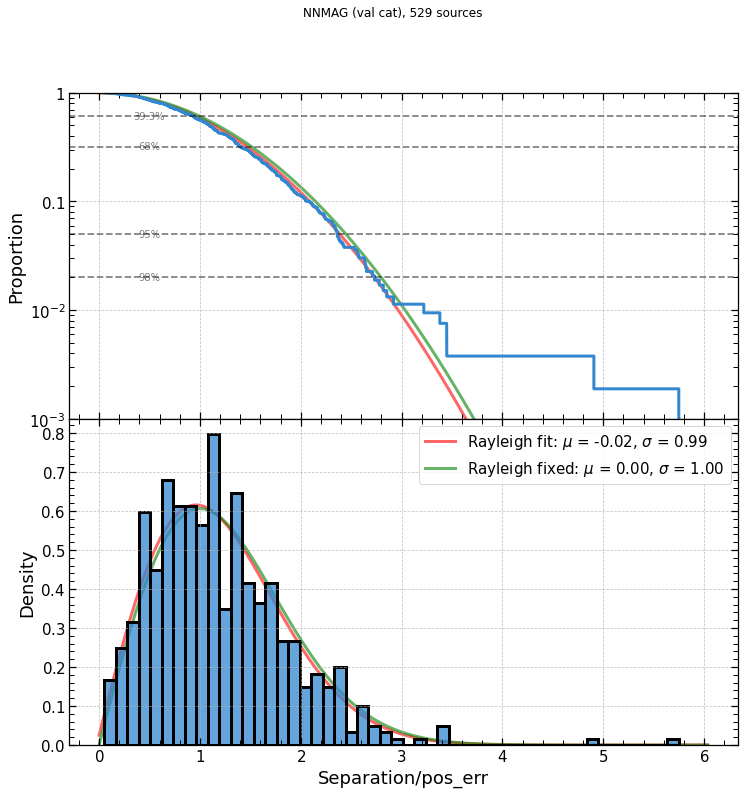

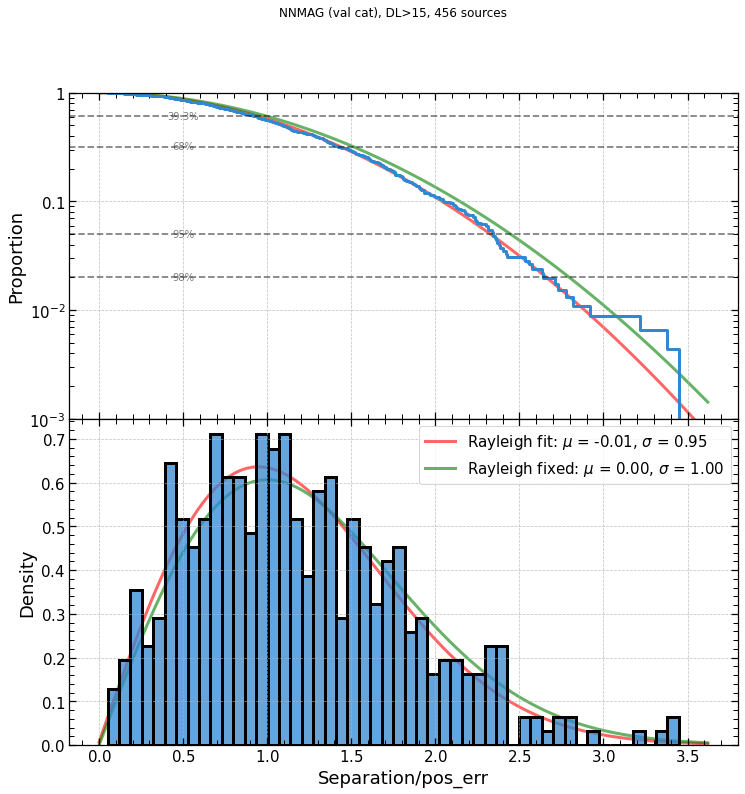

In [23]:

rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless"'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')


rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>15'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat), DL>15')


plot for paper

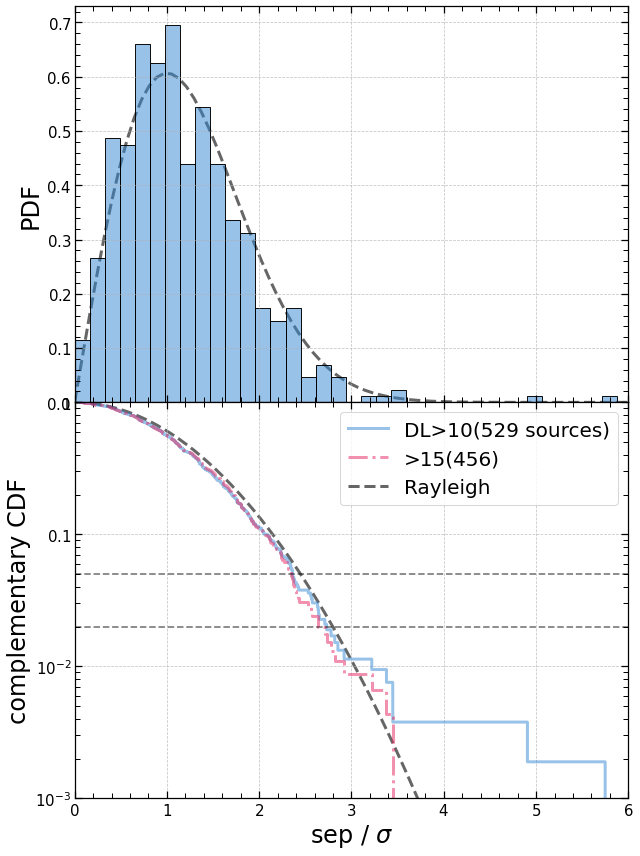

In [24]:
from scipy import stats

df1 = nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>10')
df2 = nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>15')
n1 = len(df1)
n2 = len(df2)

rat1 = df1['nway_Separation_EROSITA_DESI']/df1['pos_sigma_2d']
rat2 = df2['nway_Separation_EROSITA_DESI']/df2['pos_sigma_2d']

rayleigh_fit_1 = stats.rayleigh.fit(rat1)
rayleigh_fit_2 = stats.rayleigh.fit(rat2)


fig, axs =  plt.subplots(nrows=2, ncols = 1, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (9,12))
ax1, ax2 = axs

bins = np.linspace(0, 8, 50)
x = np.linspace(0, 8, 100)

for color, rats, labels, style in zip(['C0', 'C1'], [rat1, rat2], ['DL>10'+f"({n1} sources)", '>15'+f"({n2})"], ['-', '-.']):
    if color == 'C0':
        sns.histplot(rats, ax = ax1, color = color, label = labels, alpha = 0.5, stat = 'density', bins = bins)
        #sns.kdeplot(rats, ax = ax1, color = color, label = labels, alpha = 0.5)
    sns.ecdfplot(rats, ax = ax2, color = color, label = labels, complementary = True, lw = 3, alpha = 0.5, linestyle = style)

ax2.plot(x, 1-stats.rayleigh.cdf(x, 0,1), '--', color = 'k', lw=3, alpha=0.6, label='Rayleigh', zorder = -1)
ax1.plot(x, stats.rayleigh.pdf(x, 0,1), '--', color = 'k', lw=3, alpha=0.6, label='Rayleigh', zorder = -1)



for prob in [95, 98]:
    ax2.axhline(1 - prob/100, color = 'k', ls = '--', alpha = 0.5)
    #ax2.text(7, 1 - prob/100, f'{prob}%', ha = 'center', va = 'center', color = 'k', alpha = 0.5, fontsize = 20)

ax2.set_yscale('log')
ax2.set_ylim(1e-3, 1)
ax2.set_xlim(0, 6)
ax2.set_xlabel('sep / $\sigma$', fontsize = 24)
ax2.set_ylabel('complementary CDF', fontsize = 24)
ax1.set_ylabel('PDF', fontsize = 24)
ax2.legend(fontsize = 20)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/pos_err.pdf')


# Distribution of nnmags

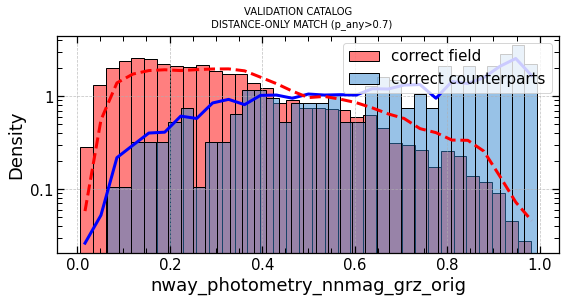

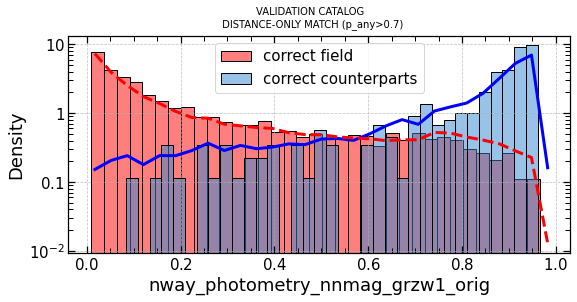

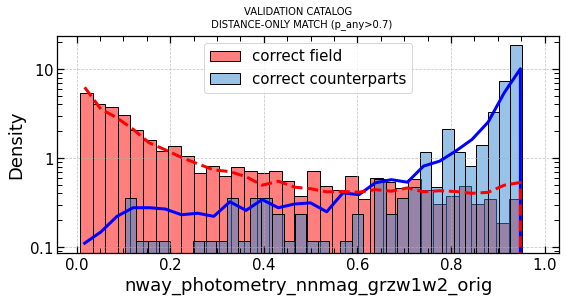

In [25]:
for prior_type in ['grz_orig', 'grzw1_orig', 'grzw1w2_orig']:

    colname = 'nway_photometry_nnmag_'+prior_type
    prob_cutoff = 0.7
    plt.figure(figsize=(9,4))

    sns.histplot(nway_all_dist_only.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==0 & {colname}!=-99. & ~desi_id_true.isnull()")[colname], stat = 'density', color = 'r', bins = 35, label = 'correct field', alpha = 0.5)

    sns.histplot(nway_all_dist_only.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==1 & {colname}!=-99. & desi_id==desi_id_true")[colname], stat = 'density', bins = 35, label = 'correct counterparts', alpha = 0.5)
    plt.suptitle(f'VALIDATION CATALOG \n DISTANCE-ONLY MATCH (p_any>{prob_cutoff})', fontsize = 10)
    plt.yscale('log')
    plt.legend()

    nnmag_name = prior_type.split('_')[0]
    model_hist = pd.read_csv(f"/Users/sdbykov/work/lockman_hole/1_desi-photo-prior/model/nnmag_{nnmag_name}.csv", sep = '\t')
    lo,hi,ctps, field = model_hist['#lo'], model_hist['hi'], model_hist['selected'], model_hist['others']

    plt.plot((lo+hi)/2, ctps, 'b-', lw = 3)
    plt.plot((lo+hi)/2, field, 'r--', lw = 3)

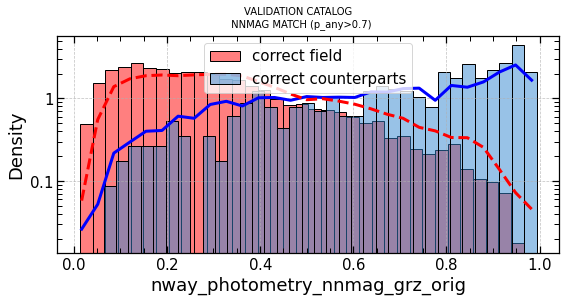

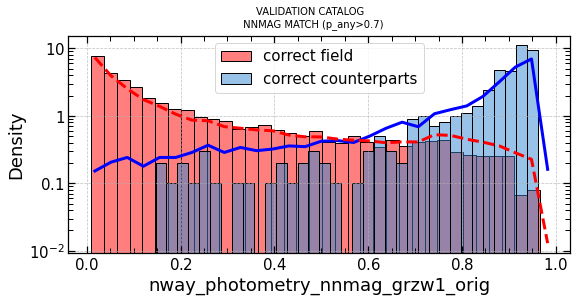

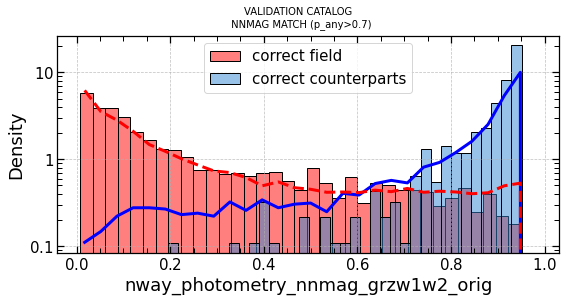

In [26]:
for prior_type in ['grz_orig', 'grzw1_orig', 'grzw1w2_orig']:


    colname = 'nway_photometry_nnmag_'+prior_type
    prob_cutoff = 0.7
    plt.figure(figsize=(9,4))

    sns.histplot(nway_all.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==0 & {colname}!=-99. & ~desi_id_true.isnull()")[colname], stat = 'density', color = 'r', bins = 35, label = 'correct field', alpha = 0.5)

    sns.histplot(nway_all.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==1 & {colname}!=-99. & desi_id==desi_id_true")[colname], stat = 'density', bins = 35, label = 'correct counterparts', alpha = 0.5)
    plt.suptitle(f'VALIDATION CATALOG \n NNMAG MATCH (p_any>{prob_cutoff})', fontsize = 10)
    plt.yscale('log')
    plt.legend()

    nnmag_name = prior_type.split('_')[0]
    model_hist = pd.read_csv(f"/Users/sdbykov/work/lockman_hole/1_desi-photo-prior/model/nnmag_{nnmag_name}.csv", sep = '\t')
    lo,hi,ctps, field = model_hist['#lo'], model_hist['hi'], model_hist['selected'], model_hist['others']

    plt.plot((lo+hi)/2, ctps, 'b-', lw = 3)
    plt.plot((lo+hi)/2, field, 'r--', lw = 3)